In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import os

In [12]:
from scipy import stats
from sklearn.discriminant_analysis import StandardScaler


def janelaDeslizante(vetor, janelaEntrada, janelaSaida):
    """
    Calcula a matriz de conhecimento

    Args:
        vetor: Array com os valores da série temporal.
        janelaEntrada: int com o tamanho da janela de entrada.
        JanelaSaida: int com o tamanho da janela de saída.

    Returns:
        X: matriz com as entradas do modelo tem tamanho (numero de amostras X tamanho da janela entrada)
        y: matriz com as saídas do modelo tem tamanho (numero de amostras X tamanho da janela de saida)
    """
    # #### YEO johnson
    # transformacao, lambda_param = stats.yeojohnson(vetor)
    # X_y = transformacao
    
    # ## Padronização
    # scaler = StandardScaler()
    # f = np.array(X_y).reshape(-1,1)
    # X_p = scaler.fit_transform(f)
    
    # X_p = np.array(X_p).flatten()
    X_p = np.array(vetor).flatten()
    
    num_amostras = len(X_p) - janelaEntrada - janelaSaida + 1
    X = np.zeros((num_amostras, janelaEntrada))
    y = np.zeros((num_amostras, janelaSaida))
    
    for i in range(num_amostras):
        X[i] = X_p[i : i + janelaEntrada]
        y[i] = X_p[i + janelaEntrada : i + janelaEntrada + janelaSaida]

    return X, y

In [13]:
def dividirConjuntoDados(X,y, tamanhoTeste=0.2):
  """
    Divide o conjunto de dados em treino e teste dado a porcentagem para o teste, sem realizar o embaralhamento
    
    Args:
        X: matriz com as entradas do modelo tem tamanho (numero de amostras X tamanho da janela entrada)
        Y: matriz com as saídas do modelo tem tamanho (numero de amostras X tamanho da janela de saida)
        tamanhoTeste: float porcentagem referente ao tamanho do teste

    Returns:
        y_pred: matriz com as previsoes realizadas pelo modelo ajustado
    """
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tamanhoTeste, random_state=42, shuffle=False)
  
  return X_train,y_train,X_test,y_test

In [14]:
# def ajustarModelo (X_train, y_train):
#   import tensorflow as tf
#   from tensorflow.keras.models import Sequential
#   from tensorflow.keras.layers import LSTM, Dense, Dropout
#   """
#     Ajusta o modelo de LSTM
    
#     Args:
#         X_train: matriz com as entradas do modelo tem tamanho (numero de amostras X tamanho da janela entrada)
#         y_train: matriz com as saídas do modelo tem tamanho (numero de amostras X tamanho da janela de saida)
#         X_test: matriz com as entradas para teste do modelo tem tamanho (numero de amostras X tamanho da janela entrada)

#     Returns:
#         y_pred: matriz com as previsoes realizadas pelo modelo ajustado
#         Retorna o modelo para ser salvo e posteriormente realizar as metricas de avaliação
#     """
    
#   model = Sequential()
#   model.add(LSTM(units=64, input_shape=(X.shape[1], 1),return_sequences=True))
  
#   for _ in range(1):
#       model.add(LSTM(units=64, return_sequences=True))
#       model.add(Dropout(0.2))
  
#   model.add(LSTM(units=64))
#   model.add(Dropout(0.2))  # Regularização Dropout
#   model.add(Dense(units=1))  # Saída única para previsão de valor futuro





#   # Compilar o modelo
#   model.compile(optimizer='adam', loss='mean_squared_error')

#   # Treinar o modelo
#   model.fit(X_train, y_train, epochs=500, batch_size=1, verbose=2)

#   # # Fazer previsões
#   # predictions = model.predict(X_test)

#   # # Fazer previsões
#   # y_pred = model.predict(X_test)

  
#   return model


In [15]:
# def ajustarModelo(X_train, y_train):
#     import tensorflow as tf
#     from tensorflow.keras.models import Sequential
#     from tensorflow.keras.layers import Dense, Dropout
    
#     """
#     Ajusta o modelo de MLP
    
#     Args:
#         X_train: matriz com as entradas do modelo tem tamanho (numero de amostras X tamanho da janela entrada)
#         y_train: matriz com as saídas do modelo tem tamanho (numero de amostras X tamanho da janela de saida)
#         X_test: matriz com as entradas para teste do modelo tem tamanho (numero de amostras X tamanho da janela entrada)

#     Returns:
#         y_pred: matriz com as previsoes realizadas pelo modelo ajustado
#         Retorna o modelo para ser salvo e posteriormente realizar as metricas de avaliação
#     """
    
#     # Definir o modelo
#     model = Sequential()
#     model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
#     model.add(Dropout(0.2))  # Regularização Dropout
    
#     model.add(Dense(units=64, activation='relu'))
#     model.add(Dropout(0.2))  # Regularização Dropout
    
#     model.add(Dense(units=32, activation='relu'))
#     model.add(Dropout(0.2))  # Regularização Dropout
    
#     model.add(Dense(units=1))  # Saída única para previsão de valor futuro

#     # Compilar o modelo
#     model.compile(optimizer='adam', loss='mean_squared_error')

#     # Treinar o modelo
#     model.fit(X_train, y_train, epochs=500, batch_size=1, verbose=2)

#     return model


In [16]:
# def ajustarModelo(X_train, y_train):
#     import tensorflow as tf
#     from tensorflow.keras.models import Sequential
#     from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten

#     """
#     Ajusta o modelo de Conv1D
    
#     Args:
#         X_train: matriz com as entradas do modelo tem tamanho (numero de amostras X tamanho da janela entrada)
#         y_train: matriz com as saídas do modelo tem tamanho (numero de amostras X tamanho da janela de saida)
#         X_test: matriz com as entradas para teste do modelo tem tamanho (numero de amostras X tamanho da janela entrada)

#     Returns:
#         y_pred: matriz com as previsoes realizadas pelo modelo ajustado
#         Retorna o modelo para ser salvo e posteriormente realizar as metricas de avaliação
#     """
    
#     # Definir o modelo
#     model = Sequential()
#     model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
#     model.add(Dropout(0.2))  # Regularização Dropout
    
#     model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#     model.add(Dropout(0.2))  # Regularização Dropout
    
#     model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
#     model.add(Dropout(0.2))  # Regularização Dropout
    
#     model.add(Flatten())  # Achatar a saída das camadas convolucionais para uma única dimensão
#     model.add(Dense(units=1))  # Saída única para previsão de valor futuro

#     # Compilar o modelo
#     model.compile(optimizer='adam', loss='mean_squared_error')

#     # Treinar o modelo
#     model.fit(X_train, y_train, epochs=500, batch_size=1, verbose=2)

#     return model


In [17]:
def ajustarModelo(X_train, y_train):
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout

    """
    Ajusta o modelo de LSTM com complexidade reduzida
    
    Args:
        X_train: matriz com as entradas do modelo tem tamanho (numero de amostras X tamanho da janela entrada)
        y_train: matriz com as saídas do modelo tem tamanho (numero de amostras X tamanho da janela de saida)
        X_test: matriz com as entradas para teste do modelo tem tamanho (numero de amostras X tamanho da janela entrada)

    Returns:
        y_pred: matriz com as previsoes realizadas pelo modelo ajustado
        Retorna o modelo para ser salvo e posteriormente realizar as metricas de avaliação
    """
    
    model = Sequential()
    model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=32))
    model.add(Dropout(0.2))  # Regularização Dropout
    model.add(Dense(units=1))  # Saída única para previsão de valor futuro

    # Compilar o modelo
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Treinar o modelo
    model.fit(X_train, y_train, epochs=500, batch_size=4, verbose=2)

    return model

In [18]:
dados_2019 = pd.read_excel('../codigos/data/2019.xlsx')

In [19]:
janeiro_2019 = dados_2019[:21]
fevereiro_2019 = dados_2019[21:41]
marco_2019 = dados_2019[41:60]
abril_2019 = dados_2019[60:81]
maio_2019 = dados_2019[81:103]
junho_2019 = dados_2019[103:122]
julho_2019 = dados_2019[122:144]
agosto_2019 = dados_2019[144:166]
setembro_2019 = dados_2019[166:187]
outubro_2019 = dados_2019[187:210]
novembro_2019 = dados_2019[210:229]
dezembro_2019 = dados_2019[229:248]

incrementos = [[], janeiro_2019, fevereiro_2019, marco_2019, abril_2019, maio_2019, junho_2019, julho_2019, agosto_2019, setembro_2019, outubro_2019, novembro_2019, dezembro_2019]
meses = ['1. Janeiro', '2. Fevereiro', '3. Março', '4. Abril', '5. Maio', '6. Junho', '7. Julho', '8. Agosto', '9. Setembro', '10. Outubro', '11. Novembro', '12. Dezembro']

In [20]:
janelas = [ '1. jan 2018 - dez 2018   - jan 2019',
            '2. jan 2018 - jan 2019   - fev 2019',
            '3. jan 2018 - fev 2019   - mar 2019',
            '4. jan 2018 - mar 2019   - abr 2019',
            '5. jan 2018 - abr 2019   - mai 2019',
            '6. jan 2018 - mai 2019   - jun 2019',
            '7. jan 2018 - jun 2019   - jul 2019',
            '8. jan 2018 - jul 2019   - ago 2019',
            '9. jan 2018 - ago 2019   - set 2019',
            '10. jan 2018 - set 2019   - out 2019',
            '11. jan 2018 - out 2019   - nov 2019',
            '12. jan 2018 - nov 2019   - dez 2019']

In [21]:
# ## MODELO INDIVIDUAL
# dados = pd.read_excel('../codigos/data/2018.xlsx')
# ativos = dados.columns[1:]

# # ativos = ativos[6:]

# for ativo in ativos:
#   if os.path.exists(f'models/mlp/individuais/2018/fixo/{ativo}.h5'):
#       print("já existe")
#       print(f'models/mlp/individuais/2018/fixo/{ativo}.h5')
#   else:

#     X,y = janelaDeslizante(dados[ativo], 22,1)

#     # X_train,y_train, X_test, y_test = dividirConjuntoDados(X,y)

#     X_train,y_train = X, y

#     model = ajustarModelo(X_train, y_train)

#     model.save(f'models/mlp/individuais/2018/fixo/{ativo}.h5')

In [22]:
# ## MODELO INDIVIDUAL com periodo deslizante
# dados = pd.read_excel('../codigos/data/2018.xlsx')
# ativos = dados.columns[1:]

# for i, janela in enumerate(janelas):
#   print(i)
  
#   if i == 0:
#     dados = pd.read_excel('../codigos/data/2018.xlsx')
#   else:
#     dados = np.concatenate((dados,incrementos[i]), axis=0)
#   dados = pd.DataFrame(dados)
#   dados.columns = ['Date'] + list(ativos)
  
  
  
#   for ativo in ativos:
        
#     if os.path.exists(f'models/conv/individuais/2018/deslizante/{janela}/{ativo}.h5'):
#       print("já existe")
#       print(f'models/conv/individuais/2018/deslizante/{janela}/{ativo}.h5')
#     else:
        
    
#       X,y = janelaDeslizante(dados[ativo], 22,1)

#       X_train,y_train = X, y

#       model = ajustarModelo(X_train, y_train)
      
#       print(f'models/lstm/individuais/2018/deslizante/{janela}/{ativo}.h5')
#       model.save(f'models/lstm/individuais/2018/deslizante/{janela}/{ativo}.h5')

In [40]:
incrementos[i]

,Date,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BEEF3,BRAP4,BRFS3,BRKM5,...,SBSP3,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIVT3,WEGE3,YDUQ3
0,2019-01-02,16.150000,9.263333,48.599998,22.395441,25.288004,4.995137,27.525454,22.379999,48.310001,...,34.369999,24.209999,12.15,9.531889,27.170000,9.76,51.090000,41.910000,8.990,24.850000
1,2019-01-03,16.330000,9.666666,48.799999,22.852491,25.532181,5.113132,26.471889,21.490000,48.599998,...,37.020000,24.280001,11.92,9.751472,26.665001,9.55,49.000000,41.400002,9.195,24.830000
2,2019-01-04,16.549999,9.316666,48.799999,22.351616,25.331829,5.309791,28.260292,21.450001,48.060001,...,37.860001,25.240000,11.98,10.020960,26.485001,10.11,52.189999,41.090000,9.300,25.209999
3,2019-01-07,16.480000,9.266666,48.480000,22.539444,25.632357,5.280293,28.481628,21.590000,47.720001,...,37.000000,24.820000,12.37,9.804704,25.674999,10.13,51.910000,41.200001,9.155,24.709999
4,2019-01-08,16.150000,9.293333,47.930000,22.789883,25.788879,5.221295,28.278000,22.930000,47.689999,...,37.139999,24.799999,12.84,9.405462,25.250000,9.77,52.410000,40.299999,9.080,24.940001
5,2019-01-09,16.379999,9.336666,47.799999,23.265715,26.233408,5.309791,29.039396,23.549999,48.009998,...,37.599998,24.799999,12.99,9.768107,26.059999,10.09,53.689999,40.720001,9.180,26.709999
6,2019-01-10,16.850000,9.423333,48.500000,23.334585,26.152016,5.349123,28.950863,23.450001,47.509998,...,37.830002,25.000000,12.50,9.947765,26.735001,10.33,53.099998,40.000000,9.250,27.100000
7,2019-01-11,17.290001,9.623333,48.700001,23.240671,25.982969,5.309791,28.853474,22.950001,48.180000,...,39.490002,25.490000,12.46,10.044249,26.594999,10.18,52.380001,40.450001,9.345,27.370001
8,2019-01-14,17.540001,9.836666,49.830002,23.265715,26.289757,5.349123,28.959717,22.670000,48.279999,...,41.599998,25.520000,12.46,10.337026,26.785000,9.87,52.599998,40.099998,9.450,28.600000
9,2019-01-15,17.700001,9.740000,49.250000,23.353369,26.239670,5.368789,28.694113,22.430000,48.330002,...,41.599998,25.150000,12.48,10.653092,26.549999,9.74,52.349998,40.360001,9.265,29.000000


In [ ]:
#   X_train.shape  ->> (180, 22)
#   X_test.shape   ->> (46, 22)

In [ ]:
## MODELO POR GRUPOS
classificacao = pd.read_excel('../codigos/resultados/2019/classes_nova.xlsx')
dados = pd.read_excel('../codigos/data/2018.xlsx')


classes = [0,1,2,3,4,5,6,7,8]

for classe in classes:
  filtro = classificacao.query(f'classes=={classe}')
  ativos = filtro['ativos']


  ## CONTROI A MATRIZ DE CONHECIMENTO PARA OS ATIVOS DO CLUSTER
  for i,ativo in enumerate(ativos):
    if i == 0 :
      X,y = janelaDeslizante(dados[ativo], 22,1)
      # X_train,y_train, X_test, y_test = dividirConjuntoDados(X,y)
      X_train,y_train = X, y
      
    else:
      X_temp,y_temp = janelaDeslizante(dados[ativo], 22,1)
      # X_train_temp, y_train_temp, X_test_temp, y_test_temp = dividirConjuntoDados(X_temp,y_temp)
      X_train_temp, y_train_temp = X_temp,y_temp
      
      X_train = np.concatenate((X_train,X_train_temp), axis=0)
      y_train = np.concatenate((y_train,y_train_temp), axis=0)
      
      # X_test = np.concatenate((X_test,X_test_temp), axis=0)
      # y_test = np.concatenate((y_test,y_test_temp), axis=0)
      
    print(ativo, i)
 
 
  ## MODELAGEM

  model = ajustarModelo(X_train, y_train)

  model.save(f'models/lstm/agrupados/2018/fixo/modeloAgrupadoClasse_{classe}.h5')

In [23]:
# ## MODELO AGRUPADO com periodo deslizante
dados = pd.read_excel('../codigos/data/2018.xlsx')
ativos = dados.columns[1:]

classificacao = pd.read_excel('../codigos/resultados/2019/classes_nova.xlsx')
dados = pd.read_excel('../codigos/data/2018.xlsx')
classes = [0,1,2,3,4,5,6,7,8]

for i, janela in enumerate(janelas):
  print(i)
  
  if i == 0:
    dados = pd.read_excel('../codigos/data/2018.xlsx')
  else:
    dados = np.concatenate((dados,incrementos[i]), axis=0)
  dados = pd.DataFrame(dados)
  dados.columns = ['Date'] + list(ativos)
  
  
  
  for ativo in ativos:
        
    if os.path.exists(f'models/conv/individuais/2018/deslizante/{janela}/{ativo}.h5'):
      print("já existe")
      print(f'models/conv/individuais/2018/deslizante/{janela}/{ativo}.h5')
    else:

      for classe in classes:
        filtro = classificacao.query(f'classes=={classe}')
        ativos = filtro['ativos']


        ## CONTROI A MATRIZ DE CONHECIMENTO PARA OS ATIVOS DO CLUSTER
        for i,ativo in enumerate(ativos):
          if i == 0 :
            X,y = janelaDeslizante(dados[ativo], 22,1)
            # X_train,y_train, X_test, y_test = dividirConjuntoDados(X,y)
            X_train,y_train = X, y
            
          else:
            X_temp,y_temp = janelaDeslizante(dados[ativo], 22,1)
            # X_train_temp, y_train_temp, X_test_temp, y_test_temp = dividirConjuntoDados(X_temp,y_temp)
            X_train_temp, y_train_temp = X_temp,y_temp
            
            X_train = np.concatenate((X_train,X_train_temp), axis=0)
            y_train = np.concatenate((y_train,y_train_temp), axis=0)
            
            # X_test = np.concatenate((X_test,X_test_temp), axis=0)
            # y_test = np.concatenate((y_test,y_test_temp), axis=0)
            
          print(ativo, i)
      
      
        ## MODELAGEM

        model = ajustarModelo(X_train, y_train)

        model.save(f'models/lstm/agrupados/2018/deslizante/{janela}/{ativo}.h5')

0
BRAP4 0
GGBR4 1
GOAU4 2
PETR3 3
PETR4 4
TIMS3 5
VALE3 6
Epoch 1/500
392/392 - 5s - loss: 310.9543 - 5s/epoch - 12ms/step
Epoch 2/500
392/392 - 2s - loss: 142.6698 - 2s/epoch - 6ms/step
Epoch 3/500
392/392 - 2s - loss: 89.6235 - 2s/epoch - 6ms/step
Epoch 4/500
392/392 - 2s - loss: 60.5425 - 2s/epoch - 6ms/step
Epoch 5/500
392/392 - 2s - loss: 40.8750 - 2s/epoch - 6ms/step
Epoch 6/500
392/392 - 2s - loss: 28.5675 - 2s/epoch - 6ms/step
Epoch 7/500
392/392 - 2s - loss: 18.3787 - 2s/epoch - 6ms/step
Epoch 8/500
392/392 - 2s - loss: 13.3493 - 2s/epoch - 6ms/step
Epoch 9/500
392/392 - 2s - loss: 11.5945 - 2s/epoch - 6ms/step
Epoch 10/500
392/392 - 2s - loss: 10.3356 - 2s/epoch - 6ms/step
Epoch 11/500
392/392 - 2s - loss: 8.8612 - 2s/epoch - 6ms/step
Epoch 12/500
392/392 - 2s - loss: 8.4037 - 2s/epoch - 6ms/step
Epoch 13/500
392/392 - 2s - loss: 8.7709 - 2s/epoch - 6ms/step
Epoch 14/500
392/392 - 2s - loss: 7.3299 - 2s/epoch - 6ms/step
Epoch 15/500
392/392 - 2s - loss: 6.6258 - 2s/epoch - 6m

In [20]:
# ### MODELO COM A MEDIA
# classificacao = pd.read_excel('../codigos/resultados/2019/classes_nova.xlsx')
# dados = pd.read_excel('../codigos/data/2018.xlsx')
# classes = [0,1,2,3,4,5,6,7,8]

# for classe in classes:
#   filtro = classificacao.query(f'classes=={classe}')
#   ativos = filtro['ativos']

#   dados['media'] = dados[ativos].T.mean()

#   X,y = janelaDeslizante(dados['media'], 22,1)

#   # X_train,y_train, X_test, y_test = dividirConjuntoDados(X,y)
#   X_train,y_train = X, y

#   model = ajustarModelo(X_train, y_train)

#   model.save(f'models/lstm/media/2018/fixo/classe_{classe}.h5')

Epoch 1/500
224/224 - 5s - loss: 104.0990 - 5s/epoch - 22ms/step
Epoch 2/500
224/224 - 2s - loss: 7.9119 - 2s/epoch - 8ms/step
Epoch 3/500
224/224 - 2s - loss: 5.3662 - 2s/epoch - 8ms/step
Epoch 4/500
224/224 - 2s - loss: 4.8434 - 2s/epoch - 8ms/step
Epoch 5/500
224/224 - 2s - loss: 4.6854 - 2s/epoch - 8ms/step
Epoch 6/500
224/224 - 2s - loss: 4.6833 - 2s/epoch - 8ms/step
Epoch 7/500
224/224 - 2s - loss: 5.1466 - 2s/epoch - 8ms/step
Epoch 8/500
224/224 - 2s - loss: 4.7007 - 2s/epoch - 8ms/step
Epoch 9/500
224/224 - 2s - loss: 4.6201 - 2s/epoch - 8ms/step
Epoch 10/500
224/224 - 2s - loss: 5.2271 - 2s/epoch - 8ms/step
Epoch 11/500
224/224 - 2s - loss: 4.7069 - 2s/epoch - 8ms/step
Epoch 12/500
224/224 - 2s - loss: 4.3713 - 2s/epoch - 8ms/step
Epoch 13/500
224/224 - 2s - loss: 5.2141 - 2s/epoch - 8ms/step
Epoch 14/500
224/224 - 2s - loss: 4.8982 - 2s/epoch - 8ms/step
Epoch 15/500
224/224 - 2s - loss: 5.2910 - 2s/epoch - 8ms/step
Epoch 16/500
224/224 - 2s - loss: 5.0750 - 2s/epoch - 8ms/ste

#### Resultados

In [1]:
resultados = {}
resultados['ABEV3'] = [ "modelo individual", "modelo Ajustado com dados do cluster", "modelo Com a media"]

In [4]:
# Calcular o MAPE
def calcular_mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [5]:
################################################################
### RESULTADOS INDIVIDUAIS

train = []
test = []

## MODELO INDIVIDUAL
dados = pd.read_excel('../codigos/data/2019.xlsx')
ativos = dados.columns[1:]

for ativo in ativos:
  X,y = janelaDeslizante(dados[ativo], 22,1)
  X_train,y_train, X_test, y_test = dividirConjuntoDados(X,y)
  modelo = tf.keras.models.load_model(f'models/conv/individuais/2018/fixo/{ativo}.h5')
  y_pred_train = modelo.predict(X_train)
  train.append(mean_absolute_percentage_error(y_train, y_pred_train))
  y_pred_test = modelo.predict(X_test)
  test.append(mean_absolute_percentage_error(y_test, y_pred_test))

2/2 [==============================] - 0s 0s/step


In [33]:
# ################################################################
# ### RESULTADOS INDIVIDUAIS com 2018 fixo prevendo os meses de 2019


# dados = pd.read_excel('../codigos/data/2018.xlsx')
# ativos = dados.columns[1:]

# for incremento, mes in zip(incrementos[1:], meses):
#   test = []
  
#   dados = pd.DataFrame(np.concatenate((dados[-22:], incremento)), columns=ativos.insert(0, 'date'))

#   for ativo in ativos:
#     dados_float = np.array(dados[ativo], dtype=float)
#     X,y = janelaDeslizante(dados_float, 22,1)

#     modelo = tf.keras.models.load_model(f'models/individuais/2018/fixo/{ativo}.h5')
#     # y_pred_train = modelo.predict(X_train)
#     # train.append(mean_absolute_percentage_error(y_train, y_pred_train))
#     y_pred_test = modelo.predict(X)
#     test.append(mean_absolute_percentage_error(y, y_pred_test))
    
#   resultado = pd.DataFrame()
#   # resultado["Modelo Individual Treino"] = train
#   resultado['ativos']= ativos
#   resultado["Modelo Individual Teste"] = test
#   # resultado.to_excel(f'Resultados_2018 1ª abordagem/{mes}/resultados.xlsx', index=False)

In [6]:
resultado = pd.DataFrame()
# resultado["Modelo Individual Treino"] = train
resultado['ativos']= ativos
resultado["Conv Individual"] = test
# resultado.to_excel('Resultados_2018 1ª abordagem/1. Janeiro/resultados.xlsx', index=False)

In [7]:
## MODELO POR GRUPOS

classificacao = pd.read_excel('../codigos/resultados/2019/classes.xlsx')

train = []
test = []

dados = pd.read_excel('../codigos/data/2019.xlsx')
ativos = dados.columns[1:]

for ativo in ativos:
    X,y = janelaDeslizante(dados[ativo], 22,1)
    X_train,y_train, X_test, y_test = dividirConjuntoDados(X,y)
    
    classe = classificacao.query("ativos=='"+ ativo +"'")['classes'].values[0]

    modelo = tf.keras.models.load_model(f'models/conv/agrupados/2018/fixo/modeloAgrupadoClasse_{classe}.h5')
    y_pred_train = modelo.predict(X_train)
    train.append(mean_absolute_percentage_error(y_train, y_pred_train))
    y_pred_test = modelo.predict(X_test)
    test.append(mean_absolute_percentage_error(y_test, y_pred_test))

2/2 [==============================] - 0s 16ms/step


In [41]:
# ################################################################
# ### RESULTADOS POR GRUPO com 2018 fixo prevendo os meses de 2019

# classificacao = pd.read_excel('../codigos/resultados/2019/classes.xlsx')

# dados = pd.read_excel('../codigos/data/2018.xlsx')
# ativos = dados.columns[1:]

# for incremento, mes in zip(incrementos[1:], meses):
#   test = []
  
#   dados = pd.DataFrame(np.concatenate((dados[-22:], incremento)), columns=ativos.insert(0, 'date'))

#   # for ativo in ativos:
#   #   dados_float = np.array(dados[ativo], dtype=float)
#   #   X,y = janelaDeslizante(dados_float, 22,1)

#   #   modelo = tf.keras.models.load_model(f'models/individuais/2018/fixo/{ativo}.h5')
#   #   # y_pred_train = modelo.predict(X_train)
#   #   # train.append(mean_absolute_percentage_error(y_train, y_pred_train))
#   #   y_pred_test = modelo.predict(X)
#   #   test.append(mean_absolute_percentage_error(y, y_pred_test))
    
#   for ativo in ativos:
#     dados_float = np.array(dados[ativo], dtype=float)
#     X,y = janelaDeslizante(dados_float, 22,1)
#     X_train,y_train, X_test, y_test = dividirConjuntoDados(X,y)
    
#     classe = classificacao.query("ativos=='"+ ativo +"'")['classes'].values[0]

#     modelo = tf.keras.models.load_model(f'models/mlp/agrupados/2018/fixo/modeloAgrupadoClasse_{classe}.h5')
#     y_pred_test = modelo.predict(X_test)
#     test.append(mean_absolute_percentage_error(y_test, y_pred_test))
    
    
    
#   # resultado = pd.read_excel(f'Resultados_2018 1ª abordagem/{mes}/resultados.xlsx')
#   # resultado["Modelo por grupos Teste"] = test
  
#   # resultado.to_excel(f'Resultados_2018 1ª abordagem/{mes}/resultados.xlsx', index=False)

In [8]:
# resultado = pd.read_excel('resultados.xlsx')
# resultado["Modelo por grupos Treino"] = train
resultado["Conv Agrupado"] = test
# resultado.to_excel('resultados.xlsx', index=False)

In [9]:
### MODELO COM A MÉDIA

train = []
test = []

dados = pd.read_excel('../codigos/data/2019.xlsx')
ativos = dados.columns[1:]

for ativo in ativos:

  X,y = janelaDeslizante(dados[ativo], 22,1)

  X_train,y_train, X_test, y_test = dividirConjuntoDados(X,y)
  
  classe = classificacao.query("ativos=='"+ ativo +"'")['classes'].values[0]

  modelo = tf.keras.models.load_model(f'models/conv/media/2018/fixo/classe_{classe}.h5')
  y_pred_train = modelo.predict(X_train)
  train.append(mean_absolute_percentage_error(y_train, y_pred_train))
  y_pred_test = modelo.predict(X_test)
  test.append(mean_absolute_percentage_error(y_test, y_pred_test))

2/2 [==============================] - 0s 0s/step


In [10]:
# resultado = pd.read_excel('resultados.xlsx')
# resultado["Modelo com a Média Treino"] = train
resultado["Conv Média"] = test
# resultado.to_excel('resultados.xlsx', index=False)

In [11]:
resultado

,ativos,Conv Individual,Conv Agrupado,Conv Média
0,ABEV3,0.124911,0.047182,0.137053
1,B3SA3,0.249836,0.088305,0.303757
2,BBAS3,0.225455,0.273144,0.256756
3,BBDC3,0.147596,0.103484,0.035767
4,BBDC4,0.167312,0.125872,0.107345
5,BEEF3,0.176256,0.152179,0.717356
6,BRAP4,0.088072,0.242847,0.200010
7,BRFS3,0.226430,0.283713,0.305852
8,BRKM5,0.609326,0.267206,0.170666
9,CCRO3,0.214113,0.144233,0.099053


In [12]:
resultado.to_excel('resultado_conv.xlsx')

In [42]:
# ################################################################
# ### RESULTADOS MODELO COM A MEDIA com 2018 fixo prevendo os meses de 2019

# classificacao = pd.read_excel('../codigos/resultados/2019/classes.xlsx')

# dados = pd.read_excel('../codigos/data/2018.xlsx')
# ativos = dados.columns[1:]

# for incremento, mes in zip(incrementos[1:], meses):
#   test = []
  
#   dados = pd.DataFrame(np.concatenate((dados[-22:], incremento)), columns=ativos.insert(0, 'date'))
    
#   for ativo in ativos:
#     dados_float = np.array(dados[ativo], dtype=float)
#     X,y = janelaDeslizante(dados_float, 22,1)
    
#     classe = classificacao.query("ativos=='"+ ativo +"'")['classes'].values[0]

#     modelo = tf.keras.models.load_model(f'models/media/2018/fixo/classe_{classe}.h5')
#     y_pred_test = modelo.predict(X)
#     test.append(mean_absolute_percentage_error(y, y_pred_test))
    
    
    
#   resultado = pd.read_excel(f'Resultados_2018 1ª abordagem/{mes}/resultados.xlsx')
#   resultado["Modelo com a Média Teste"] = test
  
#   # resultado.to_excel(f'Resultados_2018 1ª abordagem/{mes}/resultados.xlsx', index=False)

In [ ]:
## ajustar os 3 tipos de modelos

## primeira abordagem
## 2018 treino    jan -> dez   prever 2019 inteiro (um modelo prevendo todos os meses)  



## segundo modelo  -> adicionar o mes ao treinamento  (ao todo serao 13 modelos)
## 2019 teste       jan 


## no final serao 13 pastas (uma para cada mes e uma com o total do ano) -> cada pasta tara os resultados de cada clusters





In [ ]:
## Criar pastas para os meses
import os

# Lista de nomes dos meses
meses = ['1. Janeiro', '2. Fevereiro', '3. Março', '4. Abril', '5. Maio', '6. Junho', '7. Julho', '8. Agosto', '9. Setembro', '10. Outubro', '11. Novembro', '12. Dezembro']
meses = [ '1. jan 2018 - dez 2018   -> jan 2019',
          '2. jan 2018 - jan 2019   -> fev 2019',
          '3. jan 2018 - fev 2019   -> mar 2019',
          '4. jan 2018 - mar 2019   -> abr 2019',
          '5. jan 2018 - abr 2019   -> mai 2019',
          '6. jan 2018 - mai 2019   -> jun 2019',
          '7. jan 2018 - jun 2019   -> jul 2019',
          '8. jan 2018 - jul 2019   -> ago 2019',
          '9. jan 2018 - ago 2019   -> set 2019',
          '10. jan 2018 - set 2019   -> out 2019',
          '11. jan 2018 - out 2019   -> nov 2019',
          '12. jan 2018 - nov 2019   -> dez 2019']
# Diretório onde as pastas serão criadas
diretorio_base = 'models/agrupados/2018/deslizante'

# Verifica se o diretório base existe, senão cria
if not os.path.exists(diretorio_base):
    os.mkdir(diretorio_base)

# Cria uma pasta para cada mês
for mes in meses:
    nome_pasta = os.path.join(diretorio_base, mes)
    os.mkdir(nome_pasta)
    print(f"Pasta '{nome_pasta}' criada.")


Pasta 'models/agrupados/2018/deslizante/1. jan 2018 - dez 2018   -> jan 2019' criada.
Pasta 'models/agrupados/2018/deslizante/2. jan 2018 - jan 2019   -> fev 2019' criada.
Pasta 'models/agrupados/2018/deslizante/3. jan 2018 - fev 2019   -> mar 2019' criada.
Pasta 'models/agrupados/2018/deslizante/4. jan 2018 - mar 2019   -> abr 2019' criada.
Pasta 'models/agrupados/2018/deslizante/5. jan 2018 - abr 2019   -> mai 2019' criada.
Pasta 'models/agrupados/2018/deslizante/6. jan 2018 - mai 2019   -> jun 2019' criada.
Pasta 'models/agrupados/2018/deslizante/7. jan 2018 - jun 2019   -> jul 2019' criada.
Pasta 'models/agrupados/2018/deslizante/8. jan 2018 - jul 2019   -> ago 2019' criada.
Pasta 'models/agrupados/2018/deslizante/9. jan 2018 - ago 2019   -> set 2019' criada.
Pasta 'models/agrupados/2018/deslizante/10. jan 2018 - set 2019   -> out 2019' criada.
Pasta 'models/agrupados/2018/deslizante/11. jan 2018 - out 2019   -> nov 2019' criada.
Pasta 'models/agrupados/2018/deslizante/12. jan 2018

In [ ]:
dados_2019 = pd.read_excel('../codigos/data/2019_t.xlsx')

janeiro_2019 = dados_2019[:21]
fevereiro_2019 = dados_2019[21:41]
marco_2019 = dados_2019[41:60]
abril_2019 = dados_2019[60:81]
maio_2019 = dados_2019[81:103]
junho_2019 = dados_2019[103:122]
julho_2019 = dados_2019[122:144]
agosto_2019 = dados_2019[144:166]
setembro_2019 = dados_2019[166:187]
outubro_2019 = dados_2019[187:210]
novembro_2019 = dados_2019[210:229]
dezembro_2019 = dados_2019[229:248]

incrementos = [janeiro_2019, fevereiro_2019, marco_2019, abril_2019, maio_2019, junho_2019, julho_2019, agosto_2019, setembro_2019, outubro_2019, novembro_2019, dezembro_2019]
meses = ['1. Janeiro', '2. Fevereiro', '3. Março', '4. Abril', '5. Maio', '6. Junho', '7. Julho', '8. Agosto', '9. Setembro', '10. Outubro', '11. Novembro', '12. Dezembro']

In [ ]:
## MODELO INDIVIDUAL com periodo deslizante

dados_2018 = pd.read_excel('../codigos/data/2018.xlsx')
classificacao = pd.read_excel('../codigos/resultados/2019/classes.xlsx')

for i, janela in enumerate(janelas):
  print(i)
  
  if i == 0:
    dados = np.concatenate((dados_2018.tail(22),incrementos[i]), axis=0)
    
  else:
    dados = np.concatenate((incrementos[i-1],incrementos[i]), axis=0)
    
  dados = pd.DataFrame(dados, columns=dados_2018.columns)
  ativos = dados.columns[1:]
  
  test_ind = []
  test_agrupado = []
  test_media = []

  for ativo in ativos:
    
    X,y = janelaDeslizante(dados[ativo].astype(np.float64), 22,1)
    
    # Modelo Individual
    modelo = tf.keras.models.load_model(f'models/individuais/2018/deslizante/{janela}/{ativo}.h5')
    y_pred_test = modelo.predict(X)
    test_ind.append(mean_absolute_percentage_error(y, y_pred_test))
    
    
    
    classe = classificacao.query("ativos=='"+ ativo +"'")['classes'].values[0]

    # Modelo agrupado
    modelo = tf.keras.models.load_model(f'models/agrupados/2018/deslizante/{janela}/modeloAgrupadoClasse_{classe}.h5')
    y_pred_test = modelo.predict(X)
    test_agrupado.append(mean_absolute_percentage_error(y, y_pred_test))

    # Modelo com a media
    modelo = tf.keras.models.load_model(f'models/media/2018/deslizante/{janela}/classe_{classe}.h5')
    y_pred_test = modelo.predict(X)
    test_media.append(mean_absolute_percentage_error(y, y_pred_test))

  # resultado = pd.read_excel('resultados.xlsx')
  resultado_parcial = pd.DataFrame(data = {str(i) + ' Individual': test_ind,
                                    str(i) + ' Agrupado': test_agrupado,
                                    str(i) + ' Media': test_media
                                    })

  if i == 0:
    resultado = resultado_parcial
  else:
    resultado = np.concatenate((resultado, resultado_parcial), axis=1)
    resultado = pd.DataFrame(resultado)
    
resultado.insert(0, "Ativos", ativos, True)
resultado.columns = ['Ativos', '1 Individual', '1 Agrupado', '1 Media','2 Individual', '2 Agrupado', '2 Media', '3 Individual', '3 Agrupado', '3 Media', '4 Individual', '4 Agrupado', '4 Media', '5 Individual', '5 Agrupado', '5 Media', '6 Individual', '6 Agrupado', '6 Media', '7 Individual', '7 Agrupado', '7 Media', '8 Individual', '8 Agrupado', '8 Media', '9 Individual', '9 Agrupado', '9 Media', '10 Individual', '10 Agrupado', '10 Media', '11 Individual', '11 Agrupado', '11 Media', '12 Individual', '12 Agrupado', '12 Media']
# resultado.to_excel('resultados_test_deslizante.xlsx', index=False)

In [ ]:
## Resultados Periodo Fixo

dados_2018 = pd.read_excel('../codigos/data/2018_t.xlsx')
classificacao = pd.read_excel('../codigos/resultados/2019/classes.xlsx')

for i, janela in enumerate(janelas):
  print(i)
  
  if i == 0:
    dados = np.concatenate((dados_2018.tail(22), incrementos[i]), axis=0)
    
  else:
    dados = np.concatenate((incrementos[i-1],incrementos[i]), axis=0)
    
  dados = pd.DataFrame(dados, columns=dados_2018.columns)
  ativos = dados.columns[1:]
  
  test_ind = []
  test_agrupado = []
  test_media = []

  for ativo in ativos:
    print(ativo)
    
    X,y = janelaDeslizante(dados[ativo].astype(np.float64), 22,1)
    
    # Modelo Individual
    modelo = tf.keras.models.load_model(f'models/individuais/2018/fixo/{ativo}.h5')
    y_pred_test = modelo.predict(X)
    test_ind.append(mean_absolute_percentage_error(y, y_pred_test))
    
    
    
    classe = classificacao.query("ativos=='"+ ativo +"'")['classes'].values[0]

    # Modelo agrupado
    modelo = tf.keras.models.load_model(f'models/agrupados/2018/fixo/modeloAgrupadoClasse_{classe}.h5')
    y_pred_test = modelo.predict(X)
    test_agrupado.append(mean_absolute_percentage_error(y, y_pred_test))

    # Modelo com a media
    modelo = tf.keras.models.load_model(f'models/media/2018/fixo/classe_{classe}.h5')
    y_pred_test = modelo.predict(X)
    test_media.append(mean_absolute_percentage_error(y, y_pred_test))



  # resultado = pd.read_excel('resultados.xlsx')
  resultado_parcial = pd.DataFrame(data = {str(i) + ' Individual': test_ind,
                                    str(i) + ' Agrupado': test_agrupado,
                                    str(i) + ' Media': test_media
                                    })

  if i == 0:
    resultado = resultado_parcial
  else:
    resultado = np.concatenate((resultado, resultado_parcial), axis=1)
    resultado = pd.DataFrame(resultado)
    
resultado.insert(0, "Ativos", ativos, True)
resultado.columns = ['Ativos', '1 Individual', '1 Agrupado', '1 Media','2 Individual', '2 Agrupado', '2 Media', '3 Individual', '3 Agrupado', '3 Media', '4 Individual', '4 Agrupado', '4 Media', '5 Individual', '5 Agrupado', '5 Media', '6 Individual', '6 Agrupado', '6 Media', '7 Individual', '7 Agrupado', '7 Media', '8 Individual', '8 Agrupado', '8 Media', '9 Individual', '9 Agrupado', '9 Media', '10 Individual', '10 Agrupado', '10 Media', '11 Individual', '11 Agrupado', '11 Media', '12 Individual', '12 Agrupado', '12 Media']
# resultado.to_excel('resultados_novo.xlsx', index=False)



### Criar grafico de resultados individuais

In [13]:
mlp = pd.read_excel('resultado_mlp.xlsx')
lstm = pd.read_excel('resultado_lstm.xlsx')
conv = pd.read_excel('resultado_conv.xlsx')

In [79]:
pd.merge(pd.merge(mlp, lstm, on='ativos'), conv, on='ativos').to_latex('resultadosindividuais.tex', index=False)

In [81]:
pd.merge(pd.merge(mlp, lstm, on='ativos'), conv, on='ativos').to_excel('resultadosindividuais.xlsx', index=False)


In [16]:
lstm = lstm.drop(columns=['Unnamed: 0'])
mlp = mlp.drop(columns=['Unnamed: 0'])
conv = conv.drop(columns=['Unnamed: 0'])

In [24]:
conv

,ativos,Conv Individual,Conv Agrupado,Conv Média
0,ABEV3,0.124911,0.047182,0.137053
1,B3SA3,0.249836,0.088305,0.303757
2,BBAS3,0.225455,0.273144,0.256756
3,BBDC3,0.147596,0.103484,0.035767
4,BBDC4,0.167312,0.125872,0.107345
5,BEEF3,0.176256,0.152179,0.717356
6,BRAP4,0.088072,0.242847,0.200010
7,BRFS3,0.226430,0.283713,0.305852
8,BRKM5,0.609326,0.267206,0.170666
9,CCRO3,0.214113,0.144233,0.099053


In [25]:
conv_mean

Conv Individual    0.191443
Conv Agrupado      0.191372
Conv Média         0.429187
dtype: float64

In [29]:
import matplotlib.patches as patches

In [43]:
lstm_mean

Lstm Individual    0.900124
Lstm Agrupado      0.060896
Lstm Média         0.438834
dtype: float64

In [63]:
# Calculate the mean of each model's MAPE values for each approach
lstm_mean = lstm[['Lstm Individual', 'Lstm Agrupado', 'Lstm Média']].mean()
mlp_mean = mlp[['Mlp Individual', 'Mlp Agrupado', 'Mlp Média']].mean()
conv_mean = conv[['Conv Individual', 'Conv Agrupado', 'Conv Média']].mean()

lstm_mean.index = ['Individual','Agrupado','Média']
conv_mean.index = ['Individual','Agrupado','Média']
mlp_mean.index = ['Individual','Agrupado','Média']

# Combine the means into a single dataframe for plotting
mean_df = pd.DataFrame({
    'MLP': mlp_mean,
    'LSTM': lstm_mean,
    'Conv': conv_mean
}).T

mean_df

,Individual,Agrupado,Média
MLP,0.220977,0.213456,0.449103
LSTM,0.900124,0.060896,0.438834
Conv,0.191443,0.191372,0.429187


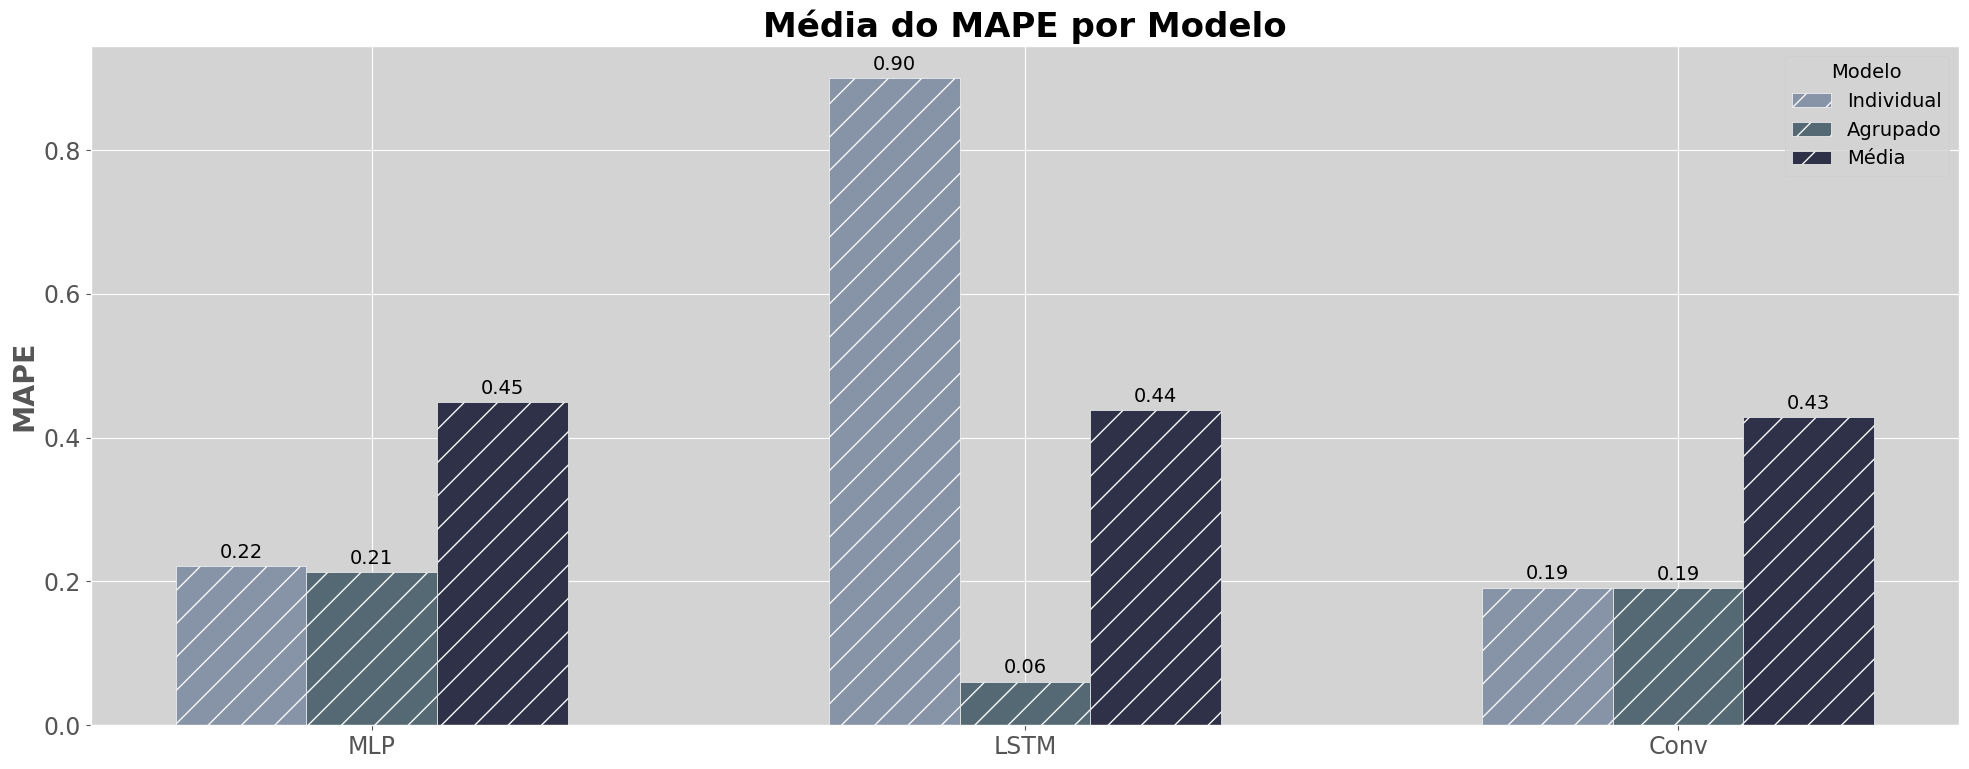

In [72]:
# Criando o plot com menor espaço entre as séries e adicionando legendas e rótulos nas colunas
fig, ax = plt.subplots(figsize=(20, 8))

# Definindo a posição das barras com menor espaçamento
barWidth = 0.2
r = np.arange(len(mean_df.index))

# Plotando as barras para cada abordagem
bars1 = ax.bar(r - barWidth, mean_df['Individual'], color='#8793a6', width=barWidth, edgecolor='#f7f7f7', hatch='/', label='Individual')
bars2 = ax.bar(r, mean_df['Agrupado'], color='#546973', width=barWidth, edgecolor='#f7f7f7', hatch='/', label='Agrupado')
bars3 = ax.bar(r + barWidth, mean_df['Média'], color='#2e3148', width=barWidth, edgecolor='#f7f7f7', hatch='/', label='Média')

# Adicionando rótulos nas colunas
for bar in bars1 + bars2 + bars3:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', va='bottom', fontsize=14)

# Definindo os rótulos dos ticks
ax.set_xticks(r)
ax.set_xticklabels(mean_df.index)

# Criar handles para as legendas
handle1 = patches.Rectangle((0, 0), 1, 1, facecolor="#f7f7f7", edgecolor="gray", hatch="/", label="Fixo")
handle2 = patches.Rectangle((0, 0), 1, 1, facecolor="#f7f7f7", edgecolor="gray", label="Deslizante")
handle3 = patches.Rectangle((0, 0), 1, 1, facecolor="#8793a6", edgecolor="#f7f7f7", label="Individual")
handle4 = patches.Rectangle((0, 0), 1, 1, facecolor="#546973", edgecolor="#f7f7f7", label="Agrupado")
handle5 = patches.Rectangle((0, 0), 1, 1, facecolor="#2e3148", edgecolor="#f7f7f7", label="Média")


# Configurando o título e rótulos dos eixos
ax.set_title('Média do MAPE por Modelo', fontweight='bold')
# ax.set_xlabel('Modelo', fontweight='bold')
ax.set_ylabel('MAPE', fontweight='bold')


ax.legend(title='Modelo', fontsize=14, title_fontsize=14)


# Exibindo o gráfico
plt.tight_layout()
plt.show()

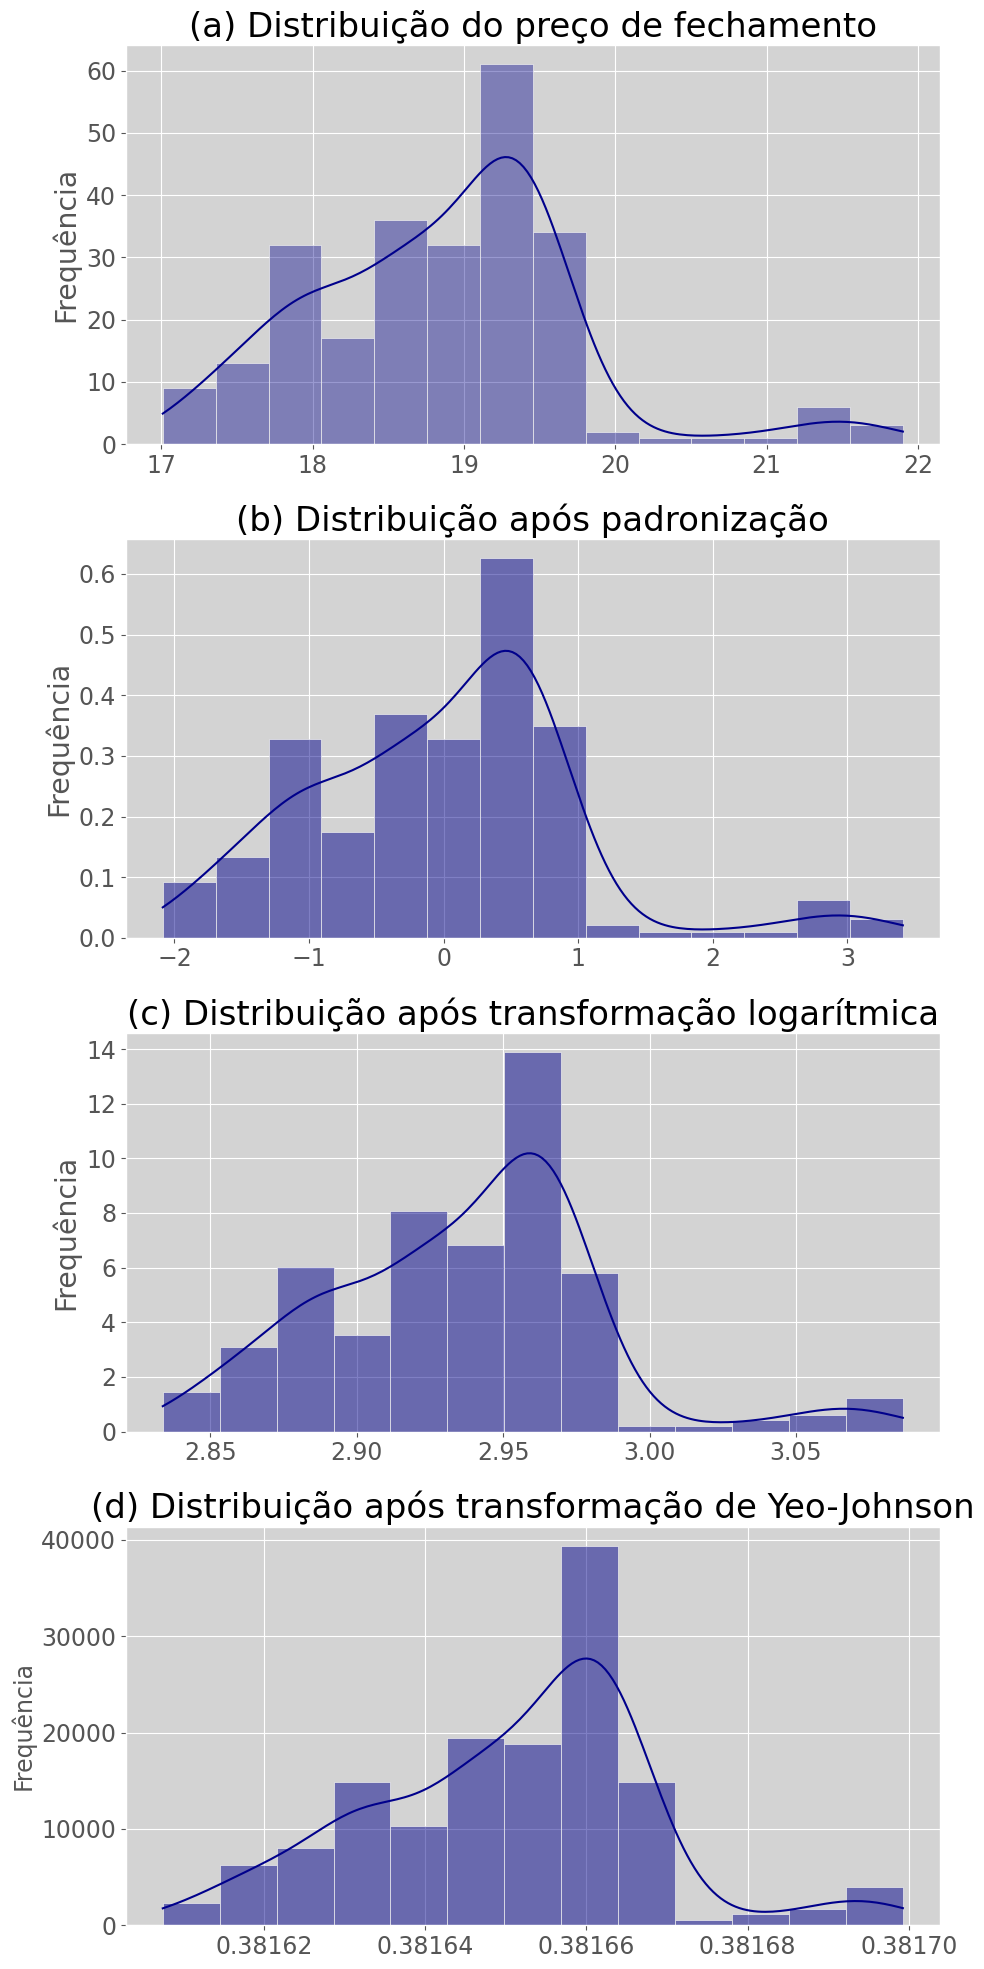

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import yeojohnson


close_price = dados['EMBR3']

# Padronização
standardized = (close_price - close_price.mean()) / close_price.std()

# Transformação logarítmica
log_transformed = np.log(close_price[close_price > 0])

# Transformação de Yeo-Johnson
yeo_johnson_transformed, _ = yeojohnson(close_price)

# Configurar o estilo do gráfico
plt.style.use('ggplot')

# Ajustar o tamanho das fontes
plt.rcParams.update({'font.size': 17})

# Plotagem
plt.figure(figsize=(10, 20))
plt.rcParams['axes.facecolor'] = 'lightgray'

# Distribuição original
plt.subplot(4, 1, 1)
sns.histplot(close_price, kde=True, color="darkblue", alpha=0.4)
plt.title('(a) Distribuição do preço de fechamento')
plt.xlabel('')
plt.ylabel('Frequência')

# Distribuição padronizada
plt.subplot(4, 1, 2)
sns.histplot(standardized, kde=True, color="darkblue", stat="density", alpha=0.5)
plt.title('(b) Distribuição após padronização')
plt.xlabel('')
plt.ylabel('Frequência')

# Distribuição após transformação logarítmica
plt.subplot(4, 1, 3)
sns.histplot(log_transformed, kde=True, color="darkblue", stat="density", alpha=0.5)
plt.title('(c) Distribuição após transformação logarítmica')
plt.xlabel('')
plt.ylabel('Frequência')

# Distribuição após transformação de Yeo-Johnson
plt.subplot(4, 1, 4)
sns.histplot(yeo_johnson_transformed, kde=True, color="darkblue", stat="density", alpha=0.5)
plt.title('(d) Distribuição após transformação de Yeo-Johnson')
plt.xlabel('')
plt.ylabel('Frequência', fontsize=17)

plt.tight_layout()
plt.show()